## Importing the required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

## Reading the datasets

In [6]:
matches = pd.read_csv("D:/cricket_dataset/matches.csv")
deliveries = pd.read_csv("D:/cricket_dataset/deliveries.csv")

In [7]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [8]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


## Exploring the datasets

In [10]:
# shape of the matches dataset
matches.shape

(1095, 20)

In [11]:
# shape of deliveries dataset
deliveries.shape

(260920, 17)

In [12]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [13]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [14]:
# number of duplicated rows in matches
matches.duplicated().sum()

0

In [15]:
# number of duplicated rows in deliveries
deliveries.duplicated().sum()

0

In [16]:
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [17]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [18]:
# names of columns in matches
matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [19]:
# names of columns in deliveries
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [20]:
# details about the matches table
matches.describe(include='all')

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
count,1.095000e+03,1095,1044,1095,1095,1090,1095,1095,1095,1095,1095,1090,1095,1076.000000,1092.000000,1092.000000,1095,21,1095,1095
unique,NaN,17,36,823,8,291,58,19,19,19,2,19,4,NaN,NaN,NaN,2,1,62,62
top,NaN,2013,Mumbai,2017-04-09,League,AB de Villiers,Eden Gardens,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,NaN,NaN,NaN,N,D/L,AK Chaudhary,S Ravi
freq,NaN,76,173,2,1029,25,77,135,138,143,704,144,578,NaN,NaN,NaN,1081,21,115,83
mean,9.048283e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.259294,165.684066,19.759341,NaN,NaN,NaN,NaN
std,3.677402e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.787444,33.427048,1.581108,NaN,NaN,NaN,NaN
min,3.359820e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,43.000000,5.000000,NaN,NaN,NaN,NaN
25%,5.483315e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,146.000000,20.000000,NaN,NaN,NaN,NaN
50%,9.809610e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,166.000000,20.000000,NaN,NaN,NaN,NaN
75%,1.254062e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,187.000000,20.000000,NaN,NaN,NaN,NaN


In [21]:
# details about the deliveries table
deliveries.describe(include='all')

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
count,2.609200e+05,260920.000000,260920,260920,260920.000000,260920.000000,260920,260920,260920,260920.000000,260920.000000,260920.000000,14125,260920.000000,12950,12950,9354
unique,NaN,NaN,19,19,NaN,NaN,673,530,663,NaN,NaN,NaN,5,NaN,629,10,607
top,NaN,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,R Ashwin,V Kohli,NaN,NaN,NaN,wides,NaN,RG Sharma,caught,MS Dhoni
freq,NaN,NaN,31437,31505,NaN,NaN,6236,4679,6067,NaN,NaN,NaN,8380,NaN,223,8063,220
mean,9.070665e+05,1.483531,NaN,NaN,9.197677,3.624486,NaN,NaN,NaN,1.265001,0.067806,1.332807,NaN,0.049632,NaN,NaN,NaN
std,3.679913e+05,0.502643,NaN,NaN,5.683484,1.814920,NaN,NaN,NaN,1.639298,0.343265,1.626416,NaN,0.217184,NaN,NaN,NaN
min,3.359820e+05,1.000000,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,5.483340e+05,1.000000,NaN,NaN,4.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
50%,9.809670e+05,1.000000,NaN,NaN,9.000000,4.000000,NaN,NaN,NaN,1.000000,0.000000,1.000000,NaN,0.000000,NaN,NaN,NaN
75%,1.254066e+06,2.000000,NaN,NaN,14.000000,5.000000,NaN,NaN,NaN,1.000000,0.000000,1.000000,NaN,0.000000,NaN,NaN,NaN


In [97]:
matches['target_runs'].describe()

count    1092.000000
mean      165.684066
std        33.427048
min        43.000000
25%       146.000000
50%       166.000000
75%       187.000000
max       288.000000
Name: target_runs, dtype: float64

In [99]:
matches['toss_decision'].describe()

count      1095
unique        2
top       field
freq        704
Name: toss_decision, dtype: object

In [22]:
matches.iloc[:5, [1, 14]]

,season,target_runs
0,2007/08,223.0
1,2007/08,241.0
2,2007/08,130.0
3,2007/08,166.0
4,2007/08,111.0


In [23]:
matches.loc[:5, ['season', 'target_runs']]

,season,target_runs
0,2007/08,223.0
1,2007/08,241.0
2,2007/08,130.0
3,2007/08,166.0
4,2007/08,111.0
5,2007/08,167.0


In [24]:
matches['year'] = matches['date'].str[:4].astype(int)

In [25]:
matches_2020 = matches.loc[matches['year'] == 2020]
matches_2020

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,year
756,1216492,2020/21,Abu Dhabi,2020-09-19,League,AT Rayudu,Sheikh Zayed Stadium,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,wickets,5.0,163.0,20.0,N,NaN,CB Gaffaney,VK Sharma,2020
757,1216493,2020/21,NaN,2020-09-20,League,MP Stoinis,Dubai International Cricket Stadium,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,...,Delhi Capitals,tie,NaN,158.0,20.0,Y,NaN,AK Chaudhary,Nitin Menon,2020
758,1216534,2020/21,NaN,2020-09-21,League,YS Chahal,Dubai International Cricket Stadium,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,...,Royal Challengers Bangalore,runs,10.0,164.0,20.0,N,NaN,AY Dandekar,Nitin Menon,2020
759,1216496,2020/21,NaN,2020-09-22,League,SV Samson,Sharjah Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Chennai Super Kings,...,Rajasthan Royals,runs,16.0,217.0,20.0,N,NaN,C Shamshuddin,VA Kulkarni,2020
760,1216508,2020/21,Abu Dhabi,2020-09-23,League,RG Sharma,Sheikh Zayed Stadium,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,...,Mumbai Indians,runs,49.0,196.0,20.0,N,NaN,CB Gaffaney,S Ravi,2020
761,1216510,2020/21,NaN,2020-09-24,League,KL Rahul,Dubai International Cricket Stadium,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,...,Kings XI Punjab,runs,97.0,207.0,20.0,N,NaN,AK Chaudhary,PR Reiffel,2020
762,1216539,2020/21,NaN,2020-09-25,League,PP Shaw,Dubai International Cricket Stadium,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,...,Delhi Capitals,runs,44.0,176.0,20.0,N,NaN,KN Ananthapadmanabhan,RK Illingworth,2020
763,1216545,2020/21,Abu Dhabi,2020-09-26,League,Shubman Gill,Sheikh Zayed Stadium,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,Kolkata Knight Riders,wickets,7.0,143.0,20.0,N,NaN,CB Gaffaney,VK Sharma,2020
764,1216527,2020/21,NaN,2020-09-27,League,SV Samson,Sharjah Cricket Stadium,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,...,Rajasthan Royals,wickets,4.0,224.0,20.0,N,NaN,RK Illingworth,K Srinivasan,2020
765,1216547,2020/21,NaN,2020-09-28,League,AB de Villiers,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,...,Royal Challengers Bangalore,tie,NaN,202.0,20.0,Y,NaN,Nitin Menon,PR Reiffel,2020


In [26]:
matches_2020_2021 = matches.loc[matches['year'].isin([2020, 2021])]
matches_2020_2021

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,year
756,1216492,2020/21,Abu Dhabi,2020-09-19,League,AT Rayudu,Sheikh Zayed Stadium,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,wickets,5.0,163.0,20.0,N,NaN,CB Gaffaney,VK Sharma,2020
757,1216493,2020/21,NaN,2020-09-20,League,MP Stoinis,Dubai International Cricket Stadium,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,...,Delhi Capitals,tie,NaN,158.0,20.0,Y,NaN,AK Chaudhary,Nitin Menon,2020
758,1216534,2020/21,NaN,2020-09-21,League,YS Chahal,Dubai International Cricket Stadium,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,...,Royal Challengers Bangalore,runs,10.0,164.0,20.0,N,NaN,AY Dandekar,Nitin Menon,2020
759,1216496,2020/21,NaN,2020-09-22,League,SV Samson,Sharjah Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Chennai Super Kings,...,Rajasthan Royals,runs,16.0,217.0,20.0,N,NaN,C Shamshuddin,VA Kulkarni,2020
760,1216508,2020/21,Abu Dhabi,2020-09-23,League,RG Sharma,Sheikh Zayed Stadium,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,...,Mumbai Indians,runs,49.0,196.0,20.0,N,NaN,CB Gaffaney,S Ravi,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1254101,2021,Dubai,2021-10-08,League,KS Bharat,Dubai International Cricket Stadium,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,...,Royal Challengers Bangalore,wickets,7.0,165.0,20.0,N,NaN,KN Ananthapadmanabhan,Nitin Menon,2021
872,1254114,2021,Dubai,2021-10-10,Qualifier 1,RD Gaikwad,Dubai International Cricket Stadium,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,wickets,4.0,173.0,20.0,N,NaN,Nitin Menon,RK Illingworth,2021
873,1254115,2021,Sharjah,2021-10-11,Eliminator,SP Narine,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,wickets,4.0,139.0,20.0,N,NaN,CB Gaffaney,VK Sharma,2021
874,1254116,2021,Sharjah,2021-10-13,Qualifier 2,VR Iyer,Sharjah Cricket Stadium,Delhi Capitals,Kolkata Knight Riders,Kolkata Knight Riders,...,Kolkata Knight Riders,wickets,3.0,136.0,20.0,N,NaN,KN Ananthapadmanabhan,MA Gough,2021


In [27]:
high_target_matches = matches.loc[matches['target_runs'] > 200, ['year', 'target_runs']]
high_target_matches

,year,target_runs
0,2008,223.0
1,2008,241.0
7,2008,209.0
8,2008,215.0
31,2008,205.0
...,...,...
1082,2024,232.0
1086,2024,209.0
1088,2024,215.0
1089,2024,219.0


In [28]:
# Unique Matches Count
unique_matches_count = matches['id'].nunique()
unique_matches_count

1095

In [29]:
# Matches per Season
matches_per_season = matches['year'].value_counts()
matches_per_season

year
2013    76
2023    74
2012    74
2022    74
2011    73
2024    71
2018    60
2021    60
2020    60
2019    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: count, dtype: int64

In [30]:
# cities hosting the matches by year
unique_cities_by_year = matches.groupby('year')['city'].unique()
unique_cities_by_year

year
2008    [Bangalore, Chandigarh, Delhi, Mumbai, Kolkata...
2009    [Cape Town, Port Elizabeth, Durban, Centurion,...
2010    [Mumbai, Chandigarh, Kolkata, Chennai, Ahmedab...
2011    [Chennai, Hyderabad, Kochi, Delhi, Mumbai, Kol...
2012    [Chennai, Kolkata, Mumbai, Jaipur, Bangalore, ...
2013    [Kolkata, Bangalore, Hyderabad, Delhi, Chennai...
2014    [Abu Dhabi, nan, Ranchi, Mumbai, Delhi, Bangal...
2015    [Kolkata, Chennai, Pune, Delhi, Mumbai, Bangal...
2016    [Mumbai, Kolkata, Chandigarh, Bangalore, Rajko...
2017    [Hyderabad, Pune, Rajkot, Indore, Bengaluru, M...
2018    [Mumbai, Chandigarh, Kolkata, Hyderabad, Chenn...
2019    [Chennai, Kolkata, Mumbai, Jaipur, Delhi, Beng...
2020                                     [Abu Dhabi, nan]
2021    [Chennai, Mumbai, Ahmedabad, Delhi, Dubai, Abu...
2022      [Mumbai, Pune, Navi Mumbai, Kolkata, Ahmedabad]
2023    [Ahmedabad, Chandigarh, Lucknow, Hyderabad, Be...
2024    [Chennai, Mohali, Kolkata, Jaipur, Ahmedabad, ...
Name: cit

In [31]:
# Matches by City
matches_by_city = matches['city'].value_counts()
matches_by_city

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Durban             15
Visakhapatnam      15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Indore              9
Navi Mumbai         9
Johannesburg        8
Cuttack             7
Port Elizabeth      7
Ranchi              7
Cape Town           7
Raipur              6
Mohali              5
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Guwahati            3
Nagpur              3
Bloemfontein        2
Name: count, dtype: int64

In [32]:
# Match Types Distribution
match_types_distribution = matches['match_type'].value_counts()
match_types_distribution

match_type
League                1029
Final                   17
Qualifier 1             14
Qualifier 2             14
Eliminator              11
Semi Final               6
Elimination Final        3
3rd Place Play-Off       1
Name: count, dtype: int64

In [33]:
# Top 10 Players of the Match
top_players_of_match = matches['player_of_match'].value_counts()
top_players_of_match.head(10)

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
V Kohli           18
MS Dhoni          17
SR Watson         16
YK Pathan         16
RA Jadeja         16
AD Russell        15
Name: count, dtype: int64

In [34]:
# Matches by Venue
matches_by_venue = matches['venue'].value_counts()
matches_by_venue

venue
Eden Gardens                                                             77
Wankhede Stadium                                                         73
M Chinnaswamy Stadium                                                    65
Feroz Shah Kotla                                                         60
Rajiv Gandhi International Stadium, Uppal                                49
MA Chidambaram Stadium, Chepauk                                          48
Sawai Mansingh Stadium                                                   47
Dubai International Cricket Stadium                                      46
Wankhede Stadium, Mumbai                                                 45
Punjab Cricket Association Stadium, Mohali                               35
Sheikh Zayed Stadium                                                     29
Sharjah Cricket Stadium                                                  28
MA Chidambaram Stadium, Chepauk, Chennai                                 28
Narend

In [35]:
# Toss Wins by Team
toss_wins_by_team = matches['toss_winner'].value_counts()
toss_wins_by_team

toss_winner
Mumbai Indians                 143
Kolkata Knight Riders          122
Chennai Super Kings            122
Rajasthan Royals               120
Royal Challengers Bangalore    113
Sunrisers Hyderabad             88
Kings XI Punjab                 85
Delhi Daredevils                80
Delhi Capitals                  50
Deccan Chargers                 43
Punjab Kings                    24
Gujarat Titans                  22
Pune Warriors                   20
Lucknow Super Giants            19
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Royal Challengers Bengaluru      8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64

In [36]:
# Toss Decisions (Bat/Bowl)
toss_decisions = matches['toss_decision'].value_counts()
toss_decisions

toss_decision
field    704
bat      391
Name: count, dtype: int64

In [37]:
# Wins by Team
wins_by_team = matches['winner'].value_counts()
wins_by_team

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Lucknow Super Giants            24
Punjab Kings                    24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

In [38]:
# Win Rate per Team
win_rate_by_team = matches['winner'].value_counts() / len(matches)
win_rate_by_team*100

winner
Mumbai Indians                 13.150685
Chennai Super Kings            12.602740
Kolkata Knight Riders          11.963470
Royal Challengers Bangalore    10.593607
Rajasthan Royals               10.228311
Kings XI Punjab                 8.036530
Sunrisers Hyderabad             8.036530
Delhi Daredevils                6.118721
Delhi Capitals                  4.383562
Deccan Chargers                 2.648402
Gujarat Titans                  2.557078
Lucknow Super Giants            2.191781
Punjab Kings                    2.191781
Gujarat Lions                   1.187215
Pune Warriors                   1.095890
Rising Pune Supergiant          0.913242
Royal Challengers Bengaluru     0.639269
Kochi Tuskers Kerala            0.547945
Rising Pune Supergiants         0.456621
Name: count, dtype: float64

In [39]:
# Result Type Distribution
result_type_distribution = matches['result'].value_counts()
result_type_distribution

result
wickets      578
runs         498
tie           14
no result      5
Name: count, dtype: int64

In [40]:
# Average Target Runs
average_target_runs = matches['target_runs'].mean()
average_target_runs

165.68406593406593

In [41]:
# Super Over Count
super_over_count = matches['super_over'].value_counts().get('Y', 0)
super_over_count

14

In [42]:
# Match Count by Umpire1 and Umpire2
matches_by_umpire1 = matches['umpire1'].value_counts()
matches_by_umpire2 = matches['umpire2'].value_counts()

In [43]:
matches_by_umpire1

umpire1
AK Chaudhary             115
HDPK Dharmasena           79
KN Ananthapadmanabhan     59
CB Gaffaney               53
Asad Rauf                 51
                        ... 
AV Jayaprakash             2
K Srinath                  2
AG Wharf                   2
SL Shastri                 1
SJA Taufel                 1
Name: count, Length: 62, dtype: int64

In [44]:
matches_by_umpire2

umpire2
S Ravi           83
VK Sharma        61
C Shamshuddin    60
Nitin Menon      54
SJA Taufel       54
                 ..
JD Cloete         1
SJ Davis          1
Subroto Das       1
BF Bowden         1
SD Fry            1
Name: count, Length: 62, dtype: int64

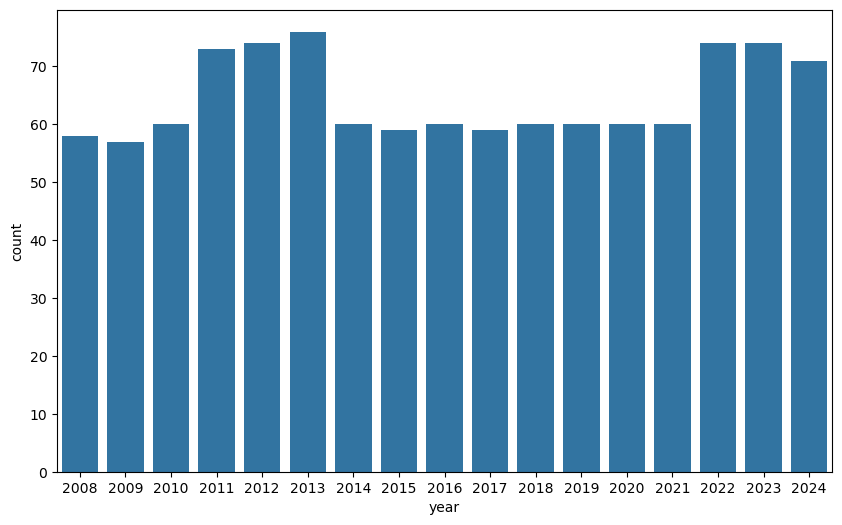

In [45]:
# number of matches played per year
plt.figure(figsize=(10,6))
sns.countplot(x=matches['year'])
plt.show()

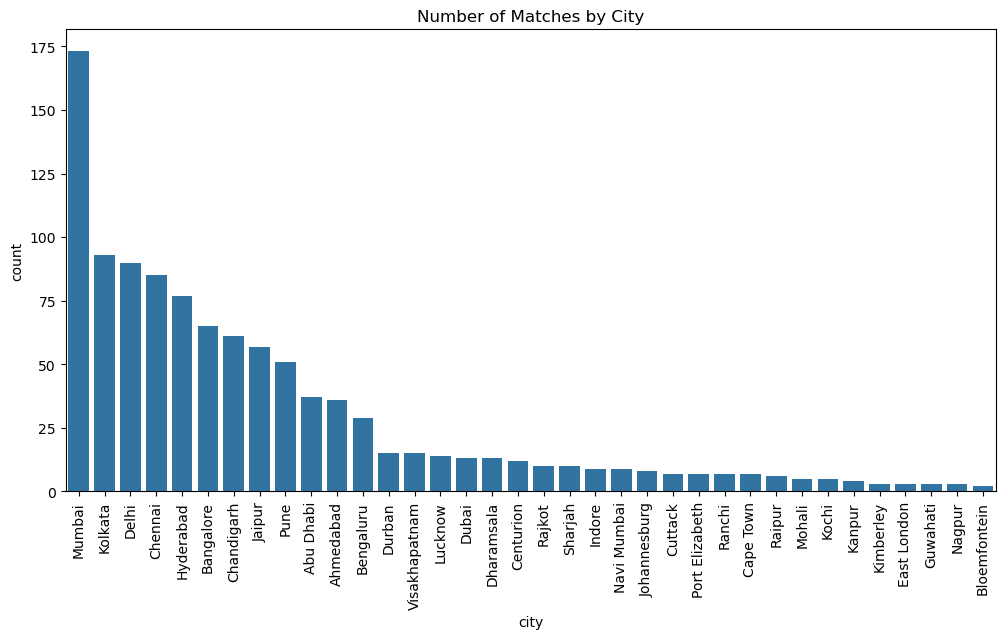

In [46]:
# number of matches by city
plt.figure(figsize=(12, 6))
sns.countplot(data=matches, x='city', order=matches['city'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Number of Matches by City")
plt.show()

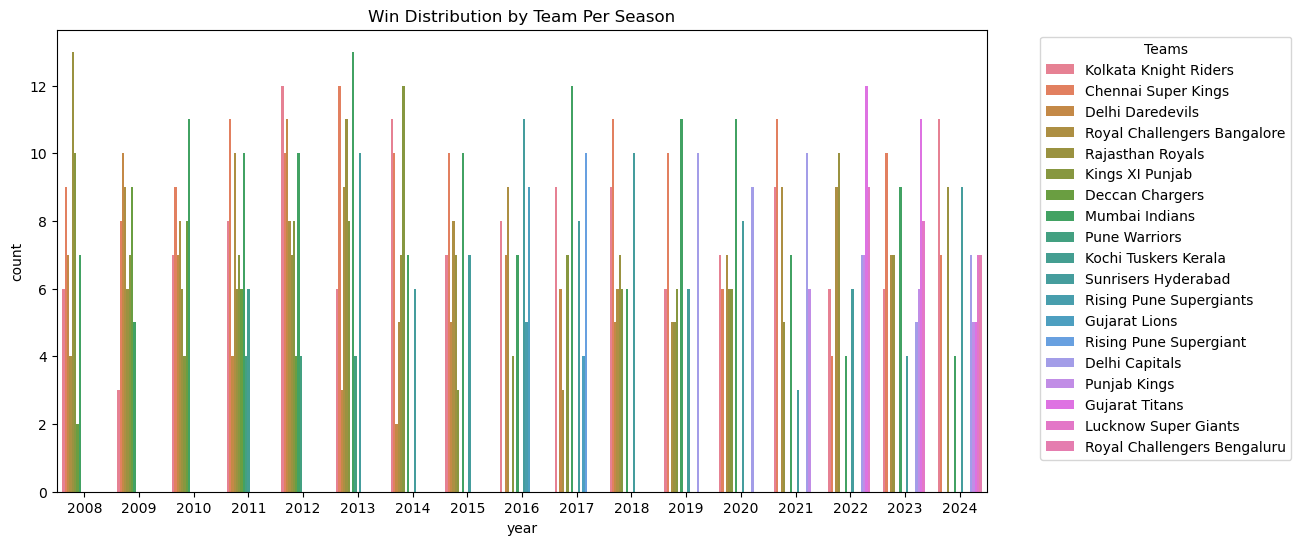

In [47]:
# win distribution by team
plt.figure(figsize=(12, 6))
sns.countplot(data=matches, x='year', hue='winner')
plt.title("Win Distribution by Team Per Season")
plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

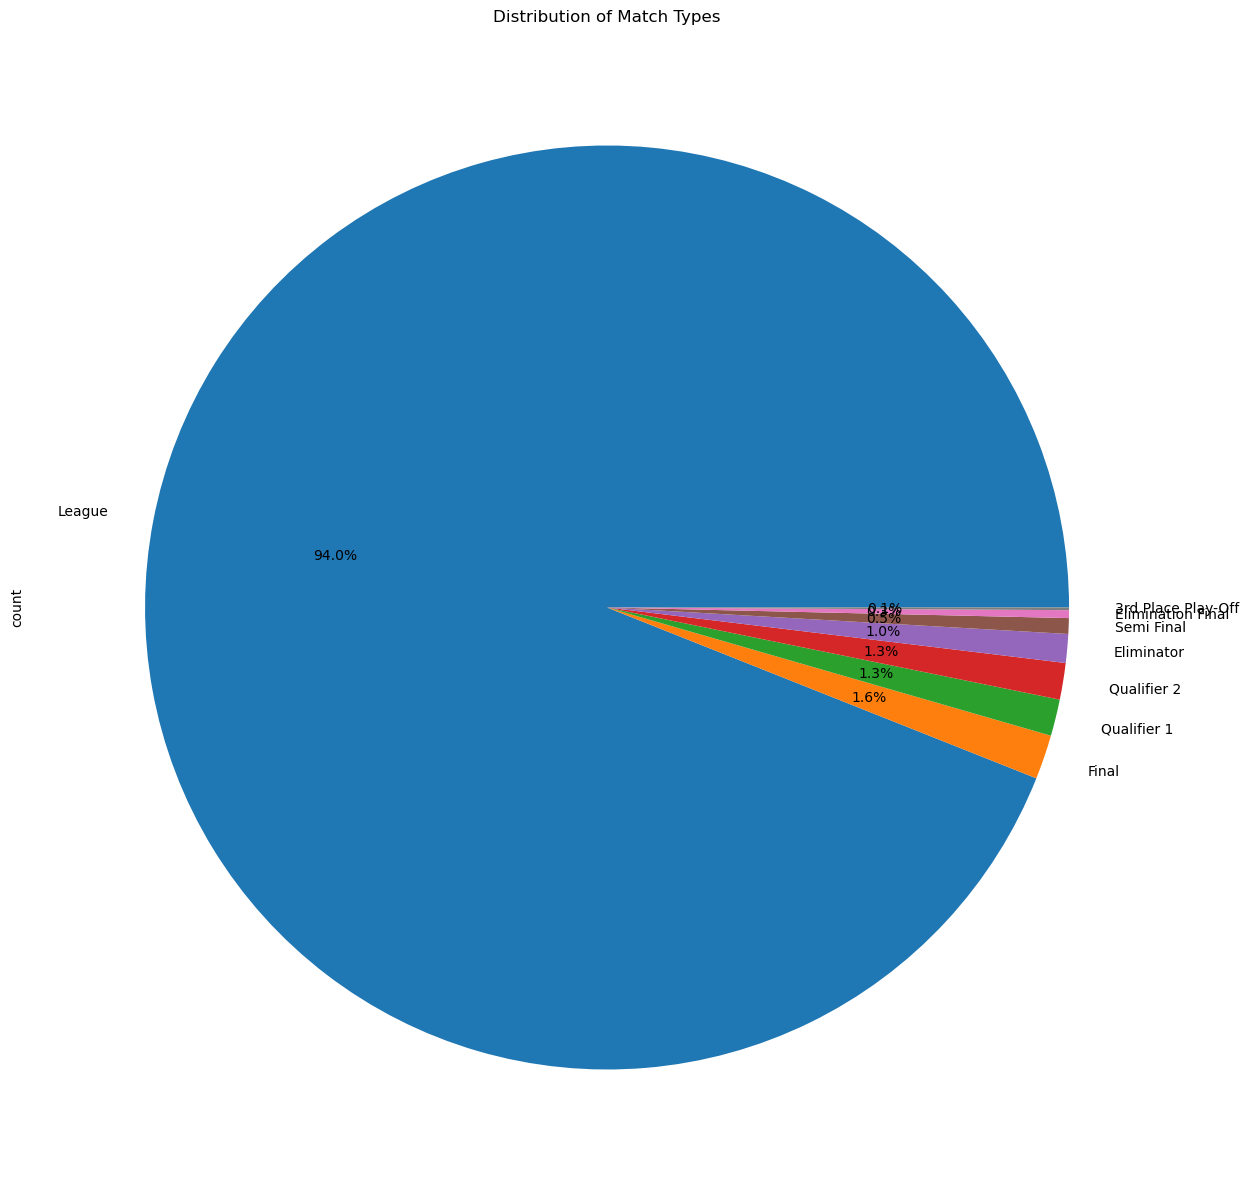

In [48]:
# matches type distribution

plt.figure(figsize=(15, 15))
matches['match_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Match Types")
plt.show()

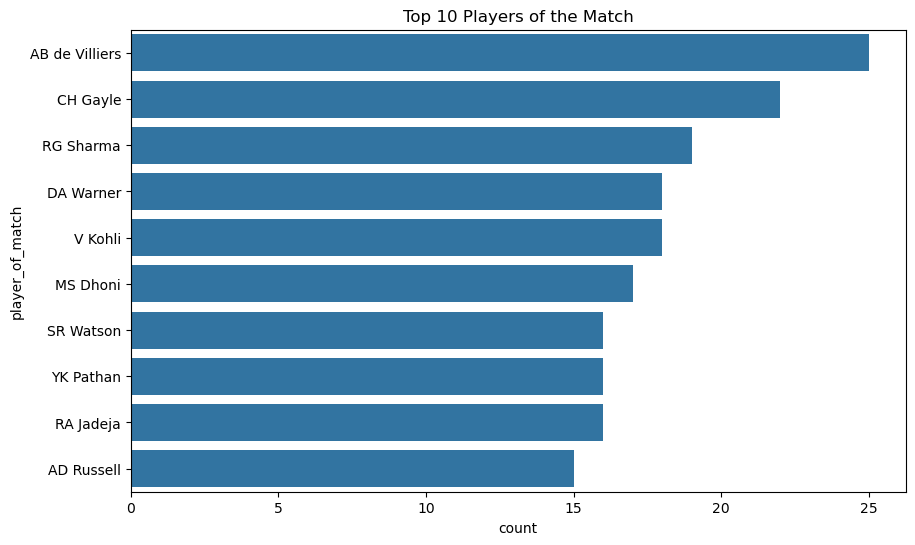

In [49]:
# Top Players of the Match

plt.figure(figsize=(10, 6))
sns.countplot(y=matches['player_of_match'], order=matches['player_of_match'].value_counts().iloc[:10].index)
plt.title("Top 10 Players of the Match")
plt.show()

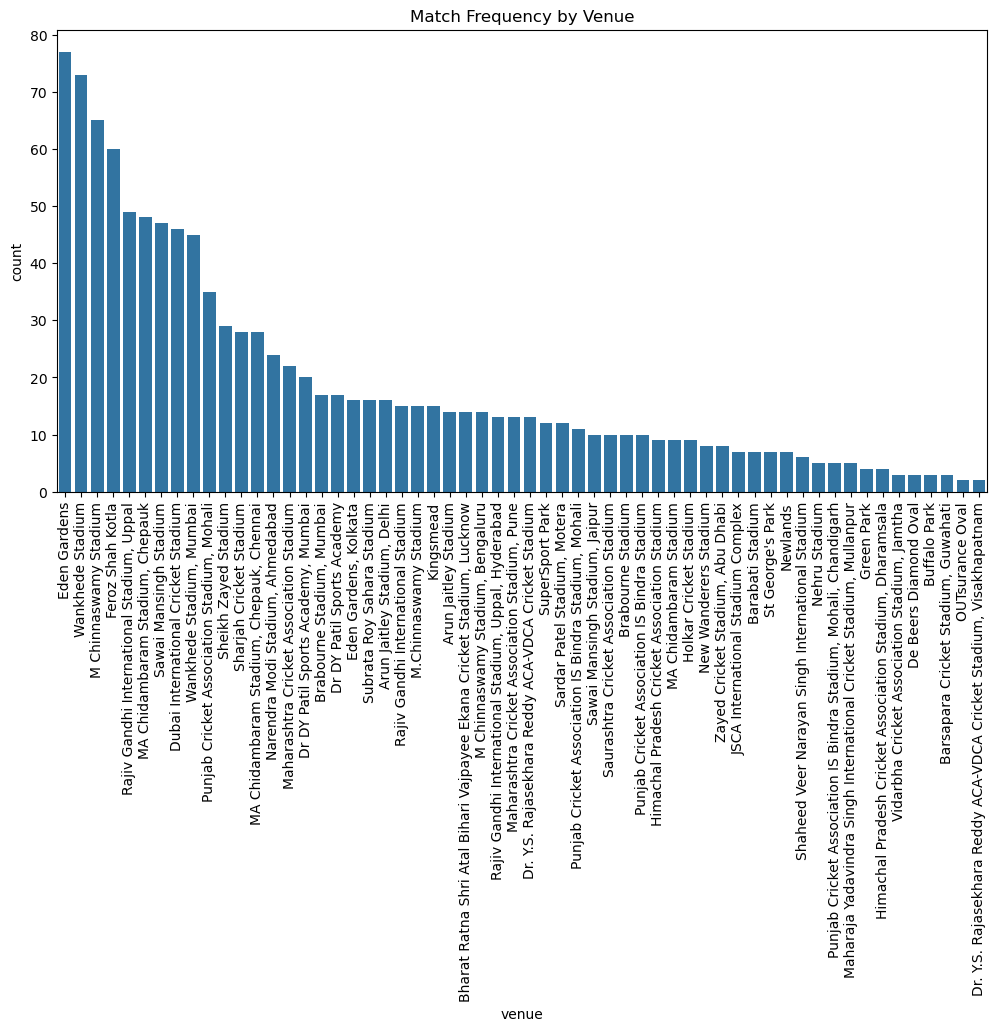

In [50]:
# Performance by Venue

plt.figure(figsize=(12, 6))
sns.countplot(data=matches, x='venue', order=matches['venue'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Match Frequency by Venue")
plt.show()